In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
pd.set_option('display.width', 1000)

In [ ]:
csv_file_path = '/content/drive/MyDrive/NMA_labs/housing.csv'
data = pd.read_csv(csv_file_path, encoding='cp1252')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
#цель y столбец 14, "иксы" с 1 по 13
k = 13
X, y = data.drop([data.columns[k]],axis = 1), data[data.columns[k]]
#конструктор признаков
poly = PolynomialFeatures(2, include_bias = False, interaction_only = True)
#делим на трейн и тест, вариант 5
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 28)
X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)
X_train.shape, X_test.shape

((404, 91), (102, 91))

In [ ]:
#скейлер сейчас "молчит"
scale = StandardScaler(with_mean = True, with_std = False)
#обучаем линейную модель (библиотечное решение)
model = LinearRegression(fit_intercept = False)
model = model.fit(X_train, y_train)
#средняя абсолютная ошибка при тестировании, коэффициент детерминации, число ненулевых
mean_absolute_error(model.predict(X_train),y_train), mean_absolute_error(model.predict(X_test),y_test)

(1.721576073979072, 2.845393688434483)

Следующие два блока кода запускать только, если нужно проверить эту часть лабораторной работы:

> Повторите расчеты для матриц X-train, X_test, дополненных с помощью
конструктора PolynomialFeatures; выполните аналогичные расчеты при
активированном скейлере:



In [ ]:
poly_features = PolynomialFeatures(degree=2)

In [ ]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.transform(X_test)

In [ ]:
#теоретически точное решение
a = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

mean_absolute_error(X_train@a,y_train), mean_absolute_error(X_test@a,y_test)

(0.4326961418319978, 7.329648390043656)

Задание 1)

Составим матрицу методом наименьших квадратов

In [ ]:
X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
# Ax = b - обычное решение слау
# A.T * A * x = A.T * b - решение МНК
# в данном случае x_train_with_bias выступает в роли A, а y_train в роли b
A_train = X_train_with_bias.T @ X_train_with_bias
b_train = X_train_with_bias.T @ y_train
condition_number = np.linalg.cond(A_train)
print(f"Число обусловленности: {condition_number:.2e}")

Число обусловленности: 6.38e+44


Как можно видеть, число обусловленности нашей матрицы очень большое. Поэтому нам потребуются псевдообратные матрицы

MAE на обучающей выборке: 0.43269591742240116
MAE на тестовой выборке: 7.329649893089497


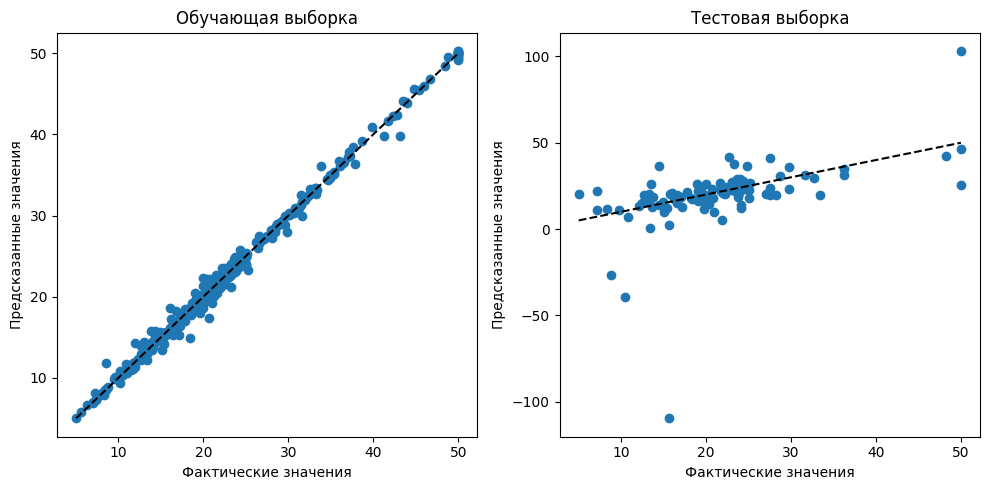

In [ ]:
# Транспонированная слау
A_inv_train = np.linalg.pinv(A_train)
# Решение системы уравнений для обучающей выборки
# по сути, вектор весов
c_train = np.dot(A_inv_train, b_train)

# Предсказание на обучающей и тестовой выборках
y_pred_train = X_train_with_bias @ c_train
y_pred_test = X_test_with_bias @ c_train

# Расчет метрики mean_absolute_error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"MAE на обучающей выборке: {mae_train}")
print(f"MAE на тестовой выборке: {mae_test}")

# Визуализация результатов
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Обучающая выборка')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Тестовая выборка')

plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import cm

<ipython-input-31-a19d26e591fc>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', unique_combinations)  # 20 различных цветов


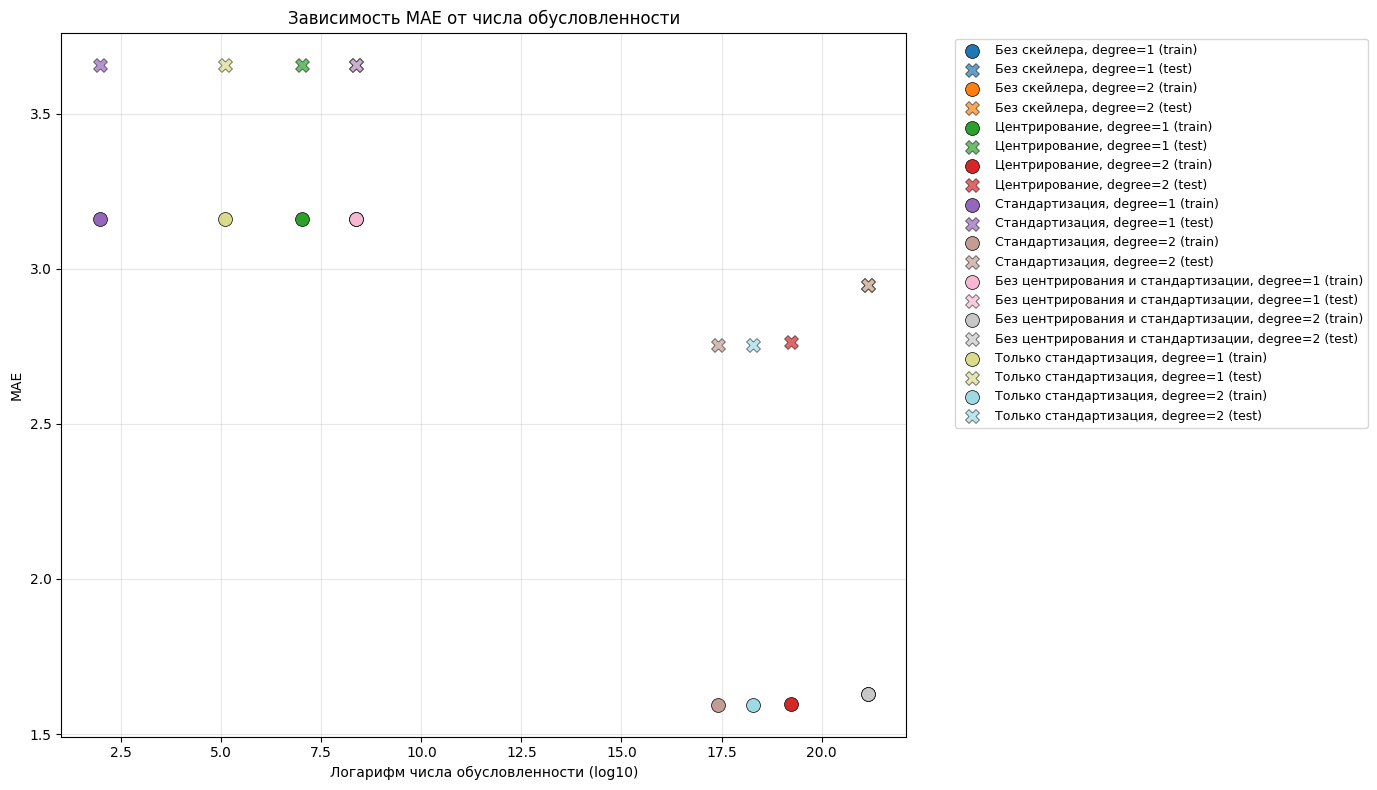

In [ ]:
degrees = [1, 2]
scalers = [
    None,
    StandardScaler(with_mean=True, with_std=False),  # Только центрирование
    StandardScaler(with_mean=True, with_std=True),    # Центрирование и стандартизация
    StandardScaler(with_mean=False, with_std=False), # Без центрирования и стандартизации
    StandardScaler(with_mean=False, with_std=True) # Только стандартизация
]
scaler_names = ['Без скейлера', 'Центрирование', 'Стандартизация', 'Без центрирования и стандартизации', 'Только стандартизация']

results = []

for degree in degrees:
    for i, scaler in enumerate(scalers):
        poly = PolynomialFeatures(degree, include_bias=False, interaction_only=False)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Применение скейлера
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X_train_poly)
            X_test_scaled = scaler.transform(X_test_poly)
        else:
            X_train_scaled = X_train_poly
            X_test_scaled = X_test_poly

        # Добавление столбца единиц
        X_train_final = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
        X_test_final = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

        # Расчет матрицы системы
        A = X_train_final.T @ X_train_final
        cond_number = np.linalg.cond(A)

        # Решение МНК
        coeff = np.linalg.pinv(A) @ X_train_final.T @ y_train

        # Расчет MAE
        y_train_pred = X_train_final @ coeff
        y_test_pred = X_test_final @ coeff
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        results.append({
            'degree': degree,
            'scaler': scaler_names[i],
            'condition_number': cond_number,
            'mae_train': mae_train,
            'mae_test': mae_test
        })

df_results = pd.DataFrame(results)
# Создаем цветовую карту
unique_combinations = len(scaler_names) * len(degrees)
colors = cm.get_cmap('tab20', unique_combinations)  # 20 различных цветов

plt.figure(figsize=(14, 8))

# Счетчик для выбора цвета
color_idx = 0

for scaler_idx, scaler_name in enumerate(scaler_names):
    for degree_idx, degree in enumerate(degrees):
        # Выбор цвета из палитры
        color = colors(color_idx / unique_combinations)
        color_idx += 1

        # Фильтрация данных
        mask = (df_results['scaler'] == scaler_name) & (df_results['degree'] == degree)
        subset = df_results[mask]

        # Визуализация
        plt.scatter(
            np.log10(subset['condition_number']),
            subset['mae_train'],
            marker='o',
            s=100,
            color=color,
            edgecolors='k',
            linewidths=0.5,
            label=f'{scaler_name}, degree={degree} (train)'
        )

        plt.scatter(
            np.log10(subset['condition_number']),
            subset['mae_test'],
            marker='X',
            s=100,
            color=color,
            edgecolors='k',
            linewidths=0.5,
            alpha=0.7,
            label=f'{scaler_name}, degree={degree} (test)'
        )

plt.xlabel('Логарифм числа обусловленности (log10)')
plt.ylabel('MAE')
plt.title('Зависимость MAE от числа обусловленности')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()